In [340]:
%config IPCompleter.greedy=True

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
flipkart_df = pd.read_csv("../data/flipkart_com-ecommerce_sample.csv")

In [342]:
# Examine data in its raw form
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [343]:
flipkart_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [344]:
flipkart_df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [345]:
flipkart_df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [346]:
flipkart_df.product_category_tree.value_counts().head()

["Jewellery >> Necklaces & Chains >> Necklaces"]                                                       1567
["Jewellery >> Rings"]                                                                                  710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]      522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]     332
Name: product_category_tree, dtype: int64

In [347]:
flipkart_df.product_category_tree.unique()

array(['["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]',
       '["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]',
       '["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]',
       ...,
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Fun To See Stickers"]'],
      dtype=object)

# uniq id

In [348]:
# Setting the index using 'index_col' while importing data to dataframe
import pandas as pd
flipkart_df = pd.read_csv("../data/flipkart_com-ecommerce_sample.csv",index_col=0)
flipkart_df.head()

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# pid

In [349]:
# On further examination 'pid' column would be the most appropriate index
flipkart_df['pid'][0:5]

uniq_id
c2d766ca982eca8304150849735ffef9    SRTEH2FF9KEDEFGF
7f7036a6d550aaa89d34c77bd39a5e48    SBEEH3QGU7MFYJFY
f449ec65dcbc041b6ae5e6a32717d01b    SHOEH4GRSUBJGZXE
0973b37acd0c664e3de26e97e5571454    SRTEH2F6HUZMQ6SJ
bc940ea42ee6bef5ac7cea3fb5cfbee7    PSOEH3ZYDMSYARJ5
Name: pid, dtype: object

In [350]:
# To identify duplicate entries in 'pid' column
pid_series=flipkart_df['pid'].value_counts() > 1 
pid_series[pid_series == True]

ACCEJ6TESY7AFT5W    True
JEAEGE8Q8GXYFTGU    True
Name: pid, dtype: bool

In [351]:
# Duplicate entry records
flipkart_df[flipkart_df['pid'].isin(['JEAEGE8Q8GXYFTGU','ACCEJ6TESY7AFT5W'])].sort_values(by='pid')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
3ddf7a0f5669f84751a36469af11b877,2016-06-10 22:31:19 +0000,http://www.flipkart.com/hako-60w-magsafe-lapto...,Hako 60W Magsafe Laptop Charger For APPLE MacB...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe Laptop Charge...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
82f424a90d630acc188fcf267160a1fe,2016-06-16 06:18:58 +0000,http://www.flipkart.com/hako-60w-magsafe1-lapt...,Hako 60W Magsafe1 Laptop Charger For APPLE Mac...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe1 Laptop Charg...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
f4e20863651ea54537388f1cd77a8776,2016-05-12 14:18:51 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> Western Wear...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."
2867c80d88e3693c883463e6358e6cc5,2016-05-10 11:57:25 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> TIMBERLAKE W...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."


In [352]:
# Removes the above identified duplicate values based on 'pid'
flipkart_df = flipkart_df.drop_duplicates(subset='pid',keep='first')

# Removed two duplicate pid rows retaining only one entry each 
flipkart_df[flipkart_df['pid'].isin(['JEAEGE8Q8GXYFTGU','ACCEJ6TESY7AFT5W'])].sort_values(by='pid')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
3ddf7a0f5669f84751a36469af11b877,2016-06-10 22:31:19 +0000,http://www.flipkart.com/hako-60w-magsafe-lapto...,Hako 60W Magsafe Laptop Charger For APPLE MacB...,"[""Computers >> Laptop Accessories >> Laptop Ad...",ACCEJ6TESY7AFT5W,2399.0,1799.0,"[""http://img6a.flixcart.com/image/laptop-adapt...",False,Key Features of Hako 60W Magsafe Laptop Charge...,No rating available,No rating available,Hako,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
f4e20863651ea54537388f1cd77a8776,2016-05-12 14:18:51 +0000,http://www.flipkart.com/timberlake-slim-fit-wo...,TIMBERLAKE Slim Fit Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> Western Wear...",JEAEGE8Q8GXYFTGU,1499.0,1099.0,"[""http://img5a.flixcart.com/image/jean/g/p/z/a...",False,Key Features of TIMBERLAKE Slim Fit Fit Women'...,No rating available,No rating available,TIMBERLAKE,"{""product_specification""=>[{""key""=>""Brand Colo..."


In [353]:
# Setting the index using 'pid' column
flipkart_df.set_index('pid',inplace=True)

In [354]:
# pid is set as the unique identifier(index) for each observation
flipkart_df.head()

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
SHOEH4GRSUBJGZXE,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
SRTEH2F6HUZMQ6SJ,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
PSOEH3ZYDMSYARJ5,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [355]:
# pid is not refrenced as column, after being used as index
flipkart_df.columns

Index(['crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'retail_price', 'discounted_price', 'image',
       'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

# crawl_timestamp

In [356]:
flipkart_df.crawl_timestamp=pd.to_datetime(flipkart_df['crawl_timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
flipkart_df.head()

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
SHOEH4GRSUBJGZXE,2016-03-25 22:59:23,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
SRTEH2F6HUZMQ6SJ,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
PSOEH3ZYDMSYARJ5,2016-03-25 22:59:23,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# product_url

In [357]:
#No clean up needed - No nulls entries
len(flipkart_df.product_url.unique())

19998

In [358]:
flipkart_df.product_url.unique()[:5]

array(['http://www.flipkart.com/alisha-solid-women-s-cycling-shorts/p/itmeh2ffvzetthbb?pid=SRTEH2FF9KEDEFGF',
       'http://www.flipkart.com/fabhomedecor-fabric-double-sofa-bed/p/itmeh3qgfamccfpy?pid=SBEEH3QGU7MFYJFY',
       'http://www.flipkart.com/aw-bellies/p/itmeh4grgfbkexnt?pid=SHOEH4GRSUBJGZXE',
       'http://www.flipkart.com/alisha-solid-women-s-cycling-shorts/p/itmeh2f6sdgah2pq?pid=SRTEH2F6HUZMQ6SJ',
       'http://www.flipkart.com/sicons-all-purpose-arnica-dog-shampoo/p/itmeh3zyw2vhgsp5?pid=PSOEH3ZYDMSYARJ5'],
      dtype=object)

# product_name

In [359]:
#No clean up needed - No nulls entries
len(flipkart_df.product_name)

19998

In [360]:
flipkart_df.product_name.unique()[:5]

array(["Alisha Solid Women's Cycling Shorts",
       'FabHomeDecor Fabric Double Sofa Bed', 'AW Bellies',
       'Sicons All Purpose Arnica Dog Shampoo',
       'Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish'],
      dtype=object)

In [361]:
# change to type 'Category'
flipkart_df.product_name=flipkart_df.product_name.astype('category')

In [362]:
len(flipkart_df.product_name.unique())

12675

# product_category_tree

*The PREDICTOR variable*

In [363]:
flipkart_df.product_category_tree[0] #Sample value

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

In [364]:
# Extracting only the first substring as a primary category
# change to datatype 'Category'
flipkart_df.product_category_tree=flipkart_df.product_category_tree.str.replace('[','').str.replace(']','').str.split('>>').str[0].str.strip('\"').astype('category')               

In [365]:
#retrieves unique categories as a series
flipkart_df.product_category_tree.unique()[:2]

[Clothing, Furniture]
Categories (266, object): [Clothing, Furniture, Footwear, Pet Supplies, ..., Pazel Slim Fit Men's Jeans, SMART TRADERS Girls Bellies, Corcepts Universal Tablet HD Ultra Clear Trans..., Areon Luxurious Fragrance Long Lasting Car,Hom...]

In [366]:
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."


# retail_price

In [367]:
len(sorted(flipkart_df.retail_price,reverse=True))

19998

In [368]:
# Null entries are correctly set to np.NaN
flipkart_df[flipkart_df['retail_price'].isnull()].head(2)

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
PSOEH3ZYYFETGCCD,2016-03-25 22:59:23,http://www.flipkart.com/sicons-all-purpose-tea...,Sicons All Purpose Tea Tree Dog Shampoo,Pet Supplies,NaN,NaN,"[""http://img6a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Tea Tree ...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
SRTEH2FD3ANFFMHP,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,NaN,NaN,"[""http://img6a.flixcart.com/image/short/m/g/y/...",False,Alisha Solid Women's Cycling Shorts - Buy Blac...,No rating available,No rating available,Alisha,NaN


# discounted_price

In [369]:
# Null entries are correctly set to np.NaN
flipkart_df[flipkart_df['discounted_price'].isnull()].head(1)

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
PSOEH3ZYYFETGCCD,2016-03-25 22:59:23,http://www.flipkart.com/sicons-all-purpose-tea...,Sicons All Purpose Tea Tree Dog Shampoo,Pet Supplies,NaN,NaN,"[""http://img6a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Tea Tree ...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# image

In [370]:
# Parsing only the image URL
flipkart_df['image'] = flipkart_df['image'].str.split('"').str[1]

In [371]:
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,http://img5a.flixcart.com/image/short/u/4/a/al...,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,http://img6a.flixcart.com/image/sofa-bed/j/f/y...,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."


# is_FK_Advantage_product

In [372]:
flipkart_df[flipkart_df.is_FK_Advantage_product.isnull()] # no Null entries 

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,


In [373]:
flipkart_df.shape

(19998, 13)

In [374]:
flipkart_df.description.head(1)

pid
SRTEH2FF9KEDEFGF    Key Features of Alisha Solid Women's Cycling S...
Name: description, dtype: object

# description

In [375]:
flipkart_df[flipkart_df.description.isnull()] # Has 2 NaN rows

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
TOPEYV38KYVJKM54,2016-01-06 18:20:45,http://www.flipkart.com/ozel-studio-casual-sle...,Ozel Studio Casual Sleeveless Printed Women's Top,Clothing,1290.0,645.0,http://img6a.flixcart.com/image/top/p/z/p/t-00...,False,NaN,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
CPCE2ZME2P7BMJFB,2015-12-20 08:26:17,http://www.flipkart.com/amore-abstract-cushion...,Amore Abstract Cushions Cover,Home Furnishing,499.0,299.0,http://img6a.flixcart.com/image/cushion-pillow...,False,NaN,No rating available,No rating available,Amore,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [376]:
'TO-DO :populate description here ' 

'TO-DO :populate description here '

# Handling nulls: Approach - 1 

# product_rating

In [377]:
 # Re-iterate the read_csv import with na_values in dict form
flipkart_df.product_rating=pd.to_numeric(flipkart_df['product_rating'],errors='coerce')
flipkart_df.product_rating.unique()

array([nan, 5. , 3. , 3.6, 3.5, 4.4, 4. , 1. , 2.3, 4.8, 2.7, 4.5, 2.4,
       3.2, 4.7, 2. , 3.3, 4.3, 3.8, 4.2, 3.7, 3.9, 2.5, 3.1, 4.1, 3.4,
       4.6, 1.5, 2.8, 2.9, 4.9, 2.2, 2.6, 1.3, 1.7, 1.8])

In [378]:
# Products without product rating
flipkart_df[flipkart_df.product_rating.isnull()].shape

(18149, 13)

# overall_rating

In [379]:
# If ‘ignore’, then invalid parsing will return the input
# pd.to_numeric(flipkart_df['overall_rating'],errors='ignore')

# If ‘coerce’, then invalid parsing will be set as NaN
flipkart_df.overall_rating = pd.to_numeric(flipkart_df['overall_rating'],errors='coerce')
flipkart_df.overall_rating.unique()

array([nan, 5. , 3. , 3.6, 3.5, 4.4, 4. , 1. , 2.3, 4.8, 2.7, 4.5, 2.4,
       3.2, 4.7, 2. , 3.3, 4.3, 3.8, 4.2, 3.7, 3.9, 2.5, 3.1, 4.1, 3.4,
       4.6, 1.5, 2.8, 2.9, 4.9, 2.2, 2.6, 1.3, 1.7, 1.8])

In [380]:
# Products without overall rating
flipkart_df[flipkart_df.overall_rating.isnull()].shape

(18149, 13)

# Handling nulls: Approach - 2

*read_csv import to handle nulls* 

na_values={'product_rating':'No rating available','overall_rating':'No rating available'})

# brand

In [381]:
flipkart_df[flipkart_df.brand.isnull()].head()

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
LINE92U9KGZG25AY,2016-01-03 20:56:50,http://www.flipkart.com/glus-wedding-lingerie-...,Glus Wedding Lingerie Set,Clothing,1299.0,699.0,http://img5a.flixcart.com/image/lingerie-set/5...,False,Glus Wedding Lingerie Set - Buy Turquoise Glus...,NaN,NaN,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
SKTEC88WSNYJKWY7,2016-01-03 20:56:50,http://www.flipkart.com/veelys-shiny-white-qua...,Veelys Shiny White Quad Roller Skates - Size 4...,Sports & Fitness,3199.0,2499.0,http://img6a.flixcart.com/image/skate/w/y/7/ve...,False,Veelys Shiny White Quad Roller Skates - Size 4...,NaN,NaN,NaN,"{""product_specification""=>[{""key""=>""Playing Le..."
VANDZY4YZFPEG85T,2016-01-03 20:56:50,http://www.flipkart.com/bulaky-vanity-case-jew...,Bulaky vanity case Jewellery Vanity Case,Beauty and Personal Care,499.0,390.0,http://img6a.flixcart.com/image/vanity-box/8/5...,False,Buy Bulaky vanity case Jewellery Vanity Case f...,3.0,3.0,NaN,"{""product_specification""=>{""key""=>""Body Materi..."
LJGEB2KMCMMHHFC7,2016-01-03 20:56:50,http://www.flipkart.com/fdt-women-s-leggings/p...,FDT Women's Leggings,Clothing,699.0,309.0,http://img6a.flixcart.com/image/legging-jeggin...,False,FDT Women's Leggings - Buy Parrot Green FDT Wo...,NaN,NaN,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
CRGE6A53UX7CJMXX,2016-01-03 20:56:50,http://www.flipkart.com/madcaps-c38gr30-men-s-...,Madcaps C38GR30 Men's Cargos,Clothing,2199.0,1699.0,http://img5a.flixcart.com/image/cargo/n/g/h/ca...,False,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,NaN,NaN,NaN,"{""product_specification""=>[{""key""=>""Number of ..."


In [382]:
flipkart_df['brand']=[str(k).split()[0] if v is np.NaN else k for k,v in zip(flipkart_df['product_name'],flipkart_df['brand'])] 

In [383]:
flipkart_df[flipkart_df.brand.isnull()].head()

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,


In [384]:
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
pid,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,http://img5a.flixcart.com/image/short/u/4/a/al...,False,Key Features of Alisha Solid Women's Cycling S...,NaN,NaN,Alisha Solid Women's Cycling Shorts,"{""product_specification""=>[{""key""=>""Number of ..."
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,http://img6a.flixcart.com/image/sofa-bed/j/f/y...,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,NaN,NaN,FabHomeDecor Fabric Double Sofa Bed,"{""product_specification""=>[{""key""=>""Installati..."


# Create new Column for Discounted amount

In [385]:
# Renaming column
flipkart_df.rename(columns={'discounted_price':'final_price'},inplace=True)

# Discount amount as a difference between retail and final price
flipkart_df['discounted_price'] = flipkart_df['retail_price']-flipkart_df['final_price']
flipkart_df[['discounted_price','retail_price','final_price'] ]
flipkart_df.head(2)

,crawl_timestamp,product_url,product_name,product_category_tree,retail_price,final_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discounted_price
pid,,,,,,,,,,,,,,
SRTEH2FF9KEDEFGF,2016-03-25 22:59:23,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,http://img5a.flixcart.com/image/short/u/4/a/al...,False,Key Features of Alisha Solid Women's Cycling S...,NaN,NaN,Alisha Solid Women's Cycling Shorts,"{""product_specification""=>[{""key""=>""Number of ...",620.0
SBEEH3QGU7MFYJFY,2016-03-25 22:59:23,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,http://img6a.flixcart.com/image/sofa-bed/j/f/y...,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,NaN,NaN,FabHomeDecor Fabric Double Sofa Bed,"{""product_specification""=>[{""key""=>""Installati...",9511.0


# Visualize

In [386]:
pd=flipkart_df.product_category_tree.value_counts()
pd.to_frame().head()

,product_category_tree
Clothing,6197
Jewellery,3531
Footwear,1227
Mobiles & Accessories,1099
Automotive,1012


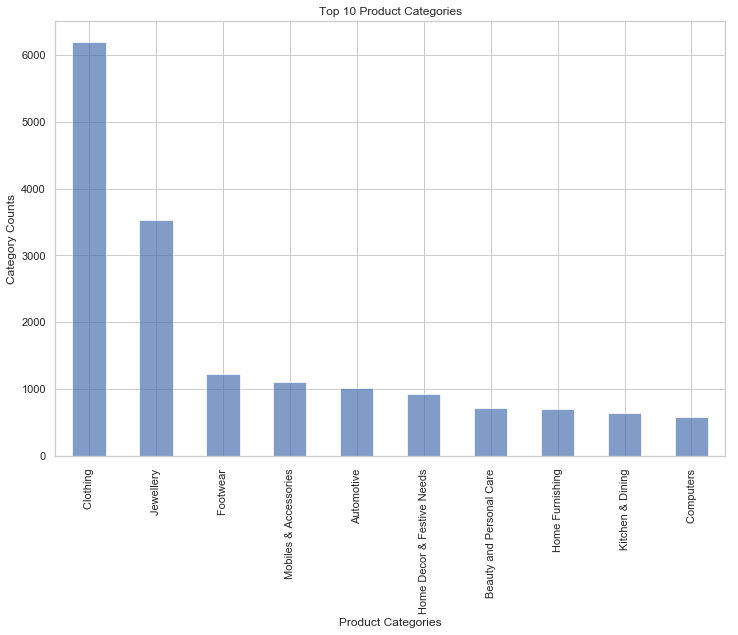

In [387]:
pd[:10].plot.bar(x=pd.index, y='product_category_tree',alpha=0.7)
_ = plt.title('Top 10 Product Categories')
_ = plt.xlabel('Product Categories')
_ = plt.ylabel('Category Counts')

In [388]:
viz = flipkart_df[['product_category_tree','retail_price','final_price','discounted_price']]
viz=viz.sort_values(by=['product_category_tree','discounted_price'],ascending=False)
viz.drop_duplicates(subset=['product_category_tree'], keep='first', inplace=True)
viz.sort_values(by=['discounted_price'],inplace=True,ascending=False)

In [389]:
viz.set_index('product_category_tree',inplace=True)
viz.head()

,retail_price,final_price,discounted_price
product_category_tree,,,
Furniture,250500.0,162825.0,87675.0
Pens & Stationery,71687.0,44804.0,26883.0
Jewellery,49999.0,24580.0,25419.0
Automotive,44880.0,22440.0,22440.0
Clothing,69999.0,48999.0,21000.0


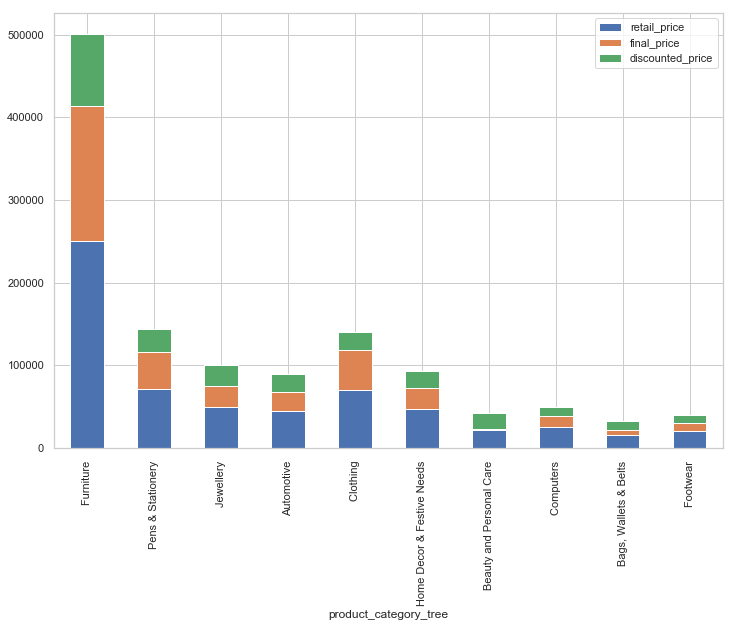

In [390]:
_=plt.rcParams["figure.figsize"] = (12,8)
viz[:10].plot.bar(stacked=True)

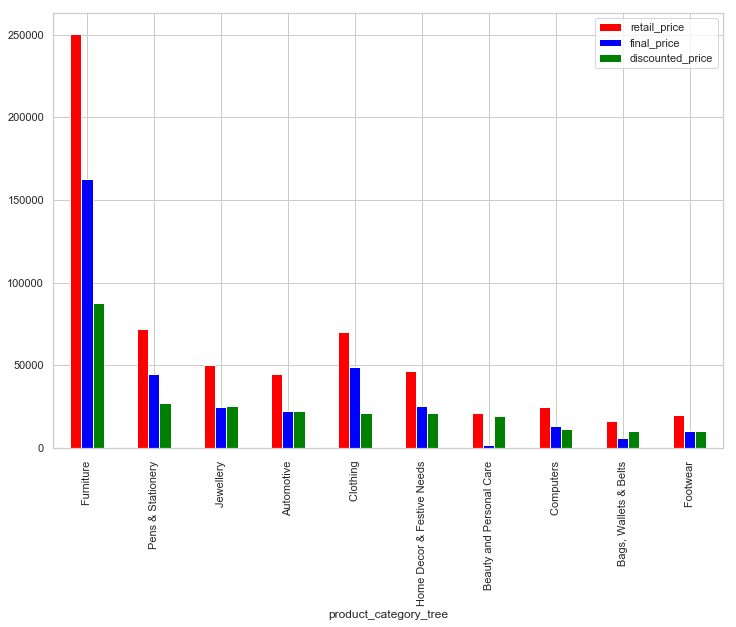

In [391]:
viz[:10].plot.bar(color=['red','blue','green'])

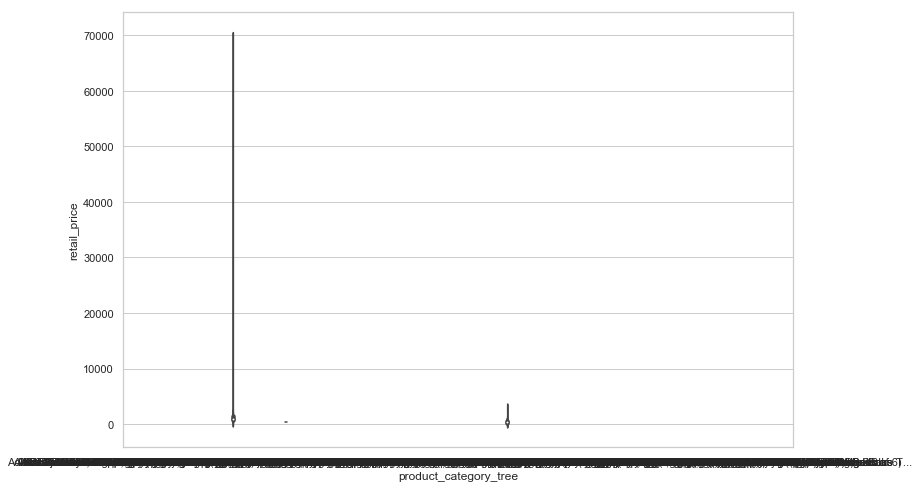

In [392]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.violinplot(x=flipkart_df["retail_price"][:10])
df=flipkart_df[flipkart_df.product_category_tree.isin(flipkart_df["product_category_tree"][4:7])][['product_category_tree','retail_price']]
df.product_category_tree.unique()
_ = sns.violinplot(x=df["product_category_tree"], y=df["retail_price"], data=df)

# product_specification

In [395]:
spec_df = flipkart_df.copy()
spec_df = spec_df.reset_index()
spec_df.columns

# Make String
spec_df['product_specifications'] = spec_df['product_specifications'].astype('str')

In [399]:
# Convert to Dictionary
import json
spec_df['product_specifications'] = spec_df['product_specifications'].apply(lambda x:{ i['key']:i['value'] for i in json.loads(x.replace('=>',':'))['product_specification'] if 'key' in i and 'value' in i and i != ''} if x != '' and 'key' in x and 'value' in x else x)

In [456]:
spec_df['product_specifications'][0]

{'Number of Contents in Sales Package': 'Pack of 3',
 'Fabric': 'Cotton Lycra',
 'Type': 'Cycling Shorts',
 'Pattern': 'Solid',
 'Ideal For': "Women's",
 'Style Code': 'ALTHT_3P_21'}

In [461]:
pd.Dataframe({'Number of Contents in Sales Package': ['Pack of 3'],
 'Fabric': ['Cotton Lycra']},index=['a', 'b', 'c'])

AttributeError: 'Series' object has no attribute 'Dataframe'

In [466]:
flipkart_df.to_csv('../data/cleaned_flipkart_df.csv')